In [1]:
# Importing packages
import os
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# Importing data with network creation prepared by Chia
nodes = pd.read_csv("youtube_raw.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# for some reason, the datafrane had the id twice, we'll drop it, as we'll drop the last columns with the video recomended 
nodes.drop("id.1", inplace = True, axis = 1 )
nodes.drop(nodes.iloc[:, 9:], inplace=True, axis=1)

## Basic properties of the network

In [5]:
# This function will be used for exploring data
def check_df(dataframe, head=5):
    print("####################################### Df info ########################################")
    print(dataframe.info())
    print(dataframe.describe())
    print("######################################### Shape ########################################")
    print(dataframe.shape)
    print("######################################### NA ###########################################")
    print(dataframe.isnull().sum())
    print("############################## Length of unique id #####################################")
    print(len(dataframe.id.unique()))
    print("################################# Length of data #######################################")
    print(len(dataframe))
    print("################################### duplicates ########################################")
    print(dataframe.duplicated().sum())
    


check_df(nodes)

# for some videos we do not have all the recommendations 

####################################### Df info ########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154817 entries, 0 to 154816
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        154817 non-null  object 
 1   uploader  154817 non-null  object 
 2   age       154817 non-null  float64
 3   category  154817 non-null  object 
 4   length    154817 non-null  float64
 5   views     154817 non-null  float64
 6   rate      154817 non-null  float64
 7   ratings   154817 non-null  float64
 8   comments  154817 non-null  float64
dtypes: float64(6), object(3)
memory usage: 10.6+ MB
None
                 age        length         views           rate  \
count  154817.000000  1.548170e+05  1.548170e+05  154817.000000   
mean      607.289671  2.175740e+02  7.741846e+03       3.489661   
std       120.578319  2.817809e+03  7.493429e+04       1.884820   
min         0.000000  0.000000e+00 

# Importing edges

In [6]:
df_edges = pd.read_csv('edges.csv', sep='\t')
df_edges.head(2)

,from,to
0,2rwktobtv9s,IqlxYO7YCI8
1,2rwktobtv9s,FkKWCBWVwQg


# Nodes

In [18]:
nodes.head(2)

,id,uploader,age,category,length,views,rate,ratings,comments
0,2rwktobtv9s,EA,742.0,Gadgets & Games,83.0,389536.0,2.65,2294.0,268.0
1,h6Ghupxbj9g,KB42PAH,742.0,Sports,28.0,276207.0,4.57,297.0,424.0


# Creating the network

In [11]:
# here we import edges from pandas, otherwise if it was an edgelist file we would have used nx.read_edgelist
G = nx.from_pandas_edgelist(df_edges, 'from', 'to')

#retrieve largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True) # we sort the connected components
G0 = G.subgraph(Gcc[0]) # we just take the first one (the biggest)


print("Largest connected component: {} nodes, {} edges".format(
        G0.number_of_nodes(), G0.number_of_edges()))

Largest connected component: 154677 nodes, 853539 edges


In [9]:
# Length of Gcc
len(Gcc)

7

In [16]:
def graph_char(graph):

    depths_graph = nx.shortest_path_length(G0, source='nn-kFlXplhk', weight=None) # picking one
    print("################# depth of the graph ################")
    depths = max(depths_graph.values())
    print(depths)
    print("################ max clique size ################")
    clique = nx.algorithms.clique.graph_clique_number(G0)
    print(clique)
 
graph_char(G0)


#### DAL LAB: 

# 1.2) Compute various characteristics of the network
def compute_network_characteristics(graph):
    prop = {}
    prop['N'] = graph.number_of_nodes() # number of nodes
    prop['M'] = graph.number_of_edges() # number of edges
    # degrees = list(dict(G.degree()).values())
    degrees = [degree for node, degree in graph.degree()] # degree list
    prop['min_degree'] = np.min(degrees) # minimum degree
    prop['max_degree'] = np.max(degrees) # maximum degree
    prop['mean_degree'] = np.mean(degrees) # mean of node degrees
    prop['median_degree'] = np.median(degrees) # median of node degrees
    prop['density'] = nx.density(graph) # density of the graph
    return prop

###################################################################
prop = compute_network_characteristics(graph=G)
print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

################# depth of the graph ################
11
################ max clique size ################
22
Number of nodes: 154815
Number of edges: 855270
Min. degree: 1
Max. degree: 332
Mean degree: 11.04892936730937
Median degree: 9.0
Density: 7.136905814273496e-05


* To compute the depth, we calculate the shortest paths from the root to every other node and find the maximum shortest path distance. 
* The diameter of a graph is the largest number of vertices which must be traversed in order to travel from one vertex to another when paths which backtrack, detour, or loop are excluded from consideration. 

# Let's now consider the nodes alone, and compute some centrality measures

We'll start with centrality. 

Degree centrality is defined as the number of links incident upon a node (i.e. the number of ties that a node has). If the network is directed (meaning that ties have direction), then two separate measures of degree centrality are defined, namely, indegree and outdegree. Indegree is a count of the number of ties directed to the node (head endpoints) and outdegree is the number of ties that the node directs to others (tail endpoints)

* the higher the degree the more central the node is

#### Computing degree centrality and degree centrality distribution

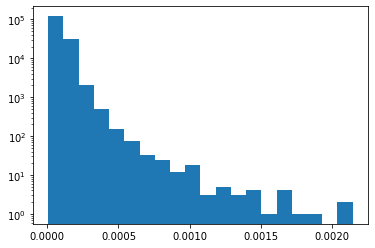

In [21]:
# Import matplotlib
import matplotlib.pyplot as plt

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G0) 
    
# Get the degree centralities
G0_dcs = [dcs[n] for n in G0.nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(G0_dcs, bins=20)
plt.show()

In [52]:
#Average degree in the graph 
# create_using= nx.DiGraph(), nodetype=int
N, K = G.order(), G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

Nodes:  154815
Edges:  855270
Average degree:  5.524464683654685


## Degree distribution

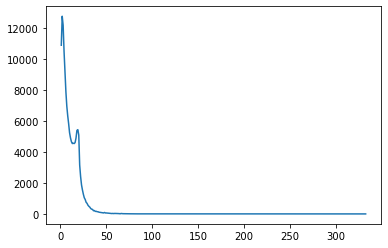

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_deg_dist(G):
    all_degrees = [ v for _, v in nx.degree(G) ]
    unique_degrees = sorted(set(all_degrees))
    count_of_degrees = []

    for i in unique_degrees:
        x = all_degrees.count(i)
        count_of_degrees.append(x)

    plt.plot(unique_degrees, count_of_degrees)
    plt.show()

plot_deg_dist(G)

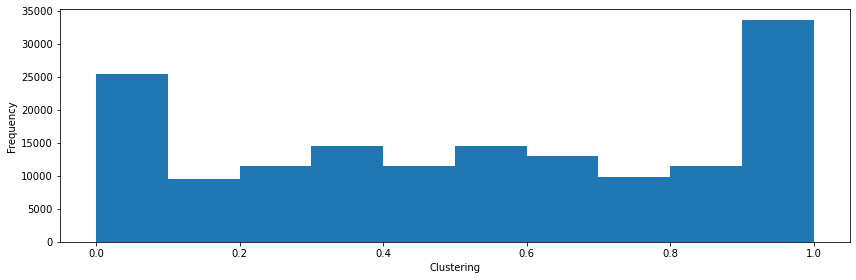

In [22]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

#gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(G0)

fig, ax2  = plt.subplots(ncols=1, figsize=(12, 4))

#This is to plot the histogram 
ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analysis of the robustness

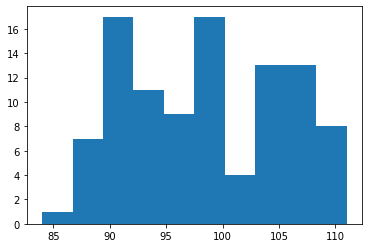

In [51]:
import matplotlib.pyplot as plt

def plot_degree_dist(G0):
  degrees = [G0.degree(n) for n in G0.nodes()]
  plt.hist(degrees)
  plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

Roughly, 
* 20% of nodes have a degree between 98 and 100
* Around 113% between 104 and 107
